In [2]:
from keras.datasets import fashion_mnist

In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:1000]
y_train = y_train[:1000]
x_train = x_train.reshape(1000,784)
x_train = x_train / 255.0
x_train.shape
import numpy as np
W_main = np.random.rand(841,784)
W_main.shape

(841, 784)

In [12]:
from operator import itemgetter
lr = 0.6
W = np.copy(W_main)
cond = True
it = 0
while cond:
    print('iteration : ', it)
    it = it + 1
    W_last_epoch = np.copy(W)
    for x in x_train:
        Dj =[]
        for i in range(W.shape[0]):
            Dj.append(np.sum(np.square(W[i]-x)))
        J = np.argmin(Dj) 
        W[J] = W[J] + lr*(x - W[J])
    lr = 0.8*lr
    print(np.max(np.absolute(W - W_last_epoch)))
    if np.max(np.absolute(W - W_last_epoch))  < 0.001:
        cond = False
print(W)

iteration :  0
0.997960916972983
iteration :  1
0.9984946223192576
iteration :  2
0.8864669168923243
iteration :  3
0.8890906250626107
iteration :  4
0.9782060856078132
iteration :  5
0.4905796033367556
iteration :  6
0.12890804449674115
iteration :  7
0.07715212981227823
iteration :  8
0.20871197074115472
iteration :  9
0.0830267549018668
iteration :  10
0.09526859827469769
iteration :  11
0.044725984475942226
iteration :  12
0.06821070122662495
iteration :  13
0.03711056060201255
iteration :  14
0.04234733972125371
iteration :  15
0.016303668705719532
iteration :  16
0.017173726383942545
iteration :  17
0.01681075202845783
iteration :  18
0.009944105447613927
iteration :  19
0.008607791765494366
iteration :  20
0.011365457315687277
iteration :  21
0.0048809852816302235
iteration :  22
0.003690362556043436
iteration :  23
0.002930231521884652
iteration :  24
0.0031715030059576987
iteration :  25
0.002201135572178159
iteration :  26
0.0016250861794404603
iteration :  27
0.0012397815042

In [42]:
x_test = x_test[:1000]
y_test = y_test[:1000]
x_test = x_test.reshape(1000,784)
x_test = x_test / 255.0
x_test.shape
y_pred = []
for x in x_test:
    Dj = []
    for i in range(W.shape[0]):
        Dj.append(np.sum(np.square(W[i]-x)))
    J = np.argmin(Dj)
    y_pred.append(J)

In [43]:
from collections import Counter
count =Counter(y_pred)

In [44]:
count

Counter({120: 145, 812: 131, 620: 182, 646: 149, 421: 192, 565: 201})

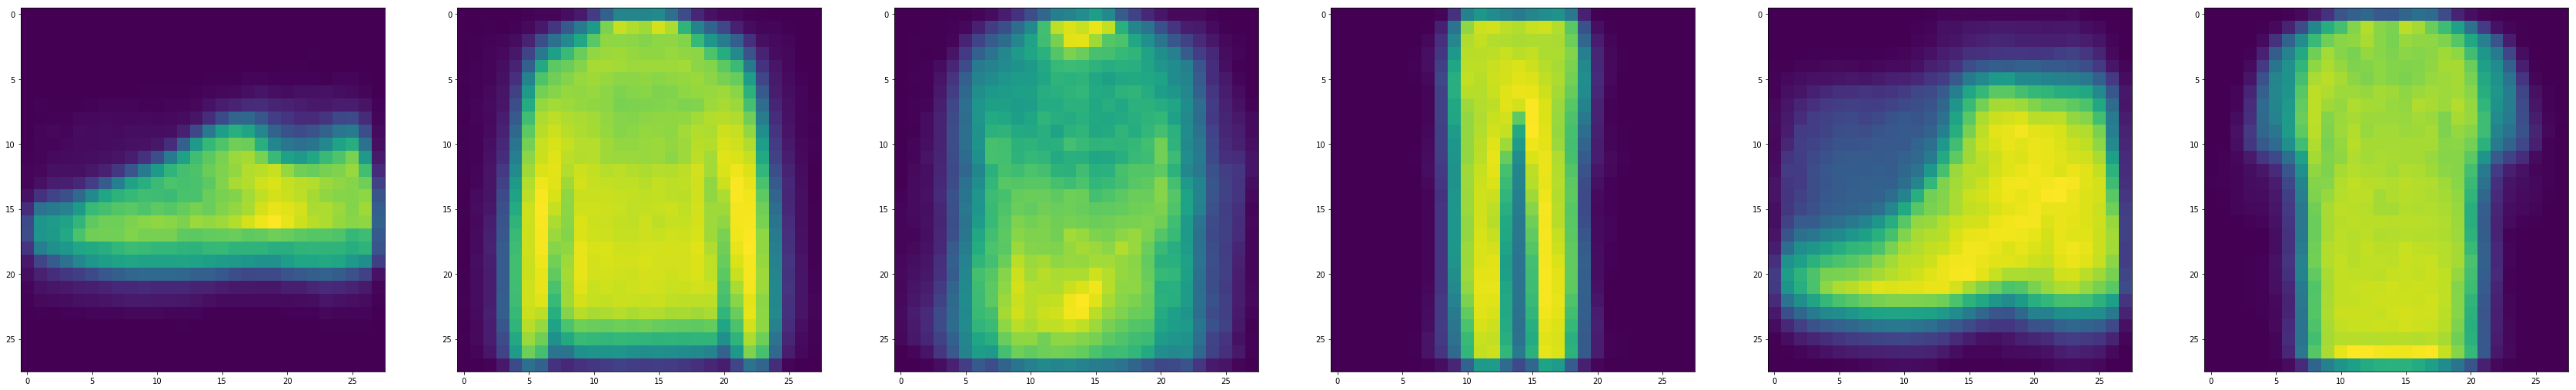

In [45]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(100,28))
j = 0
for (i,n) in count.most_common():
    j+=1
    fig.add_subplot(2,10 , j)
    imshow(W[i].reshape(28,28))

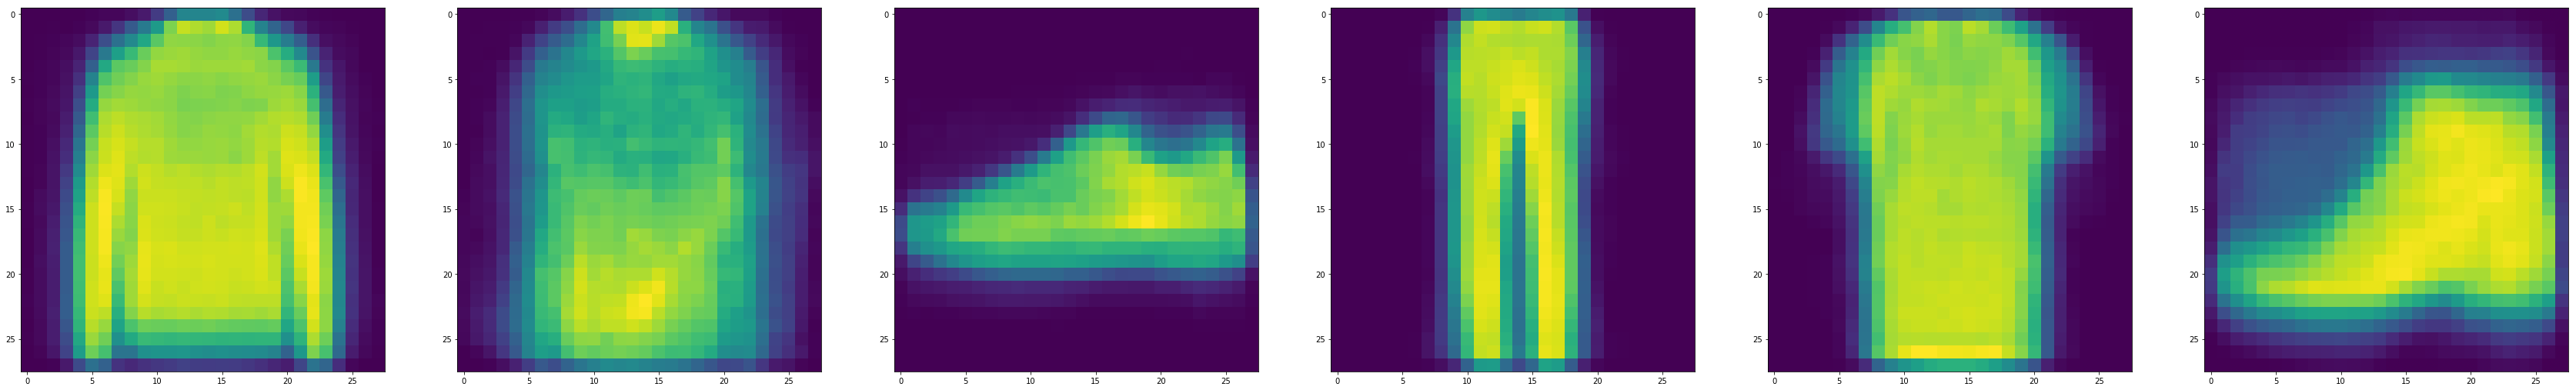

In [16]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(100,28))
j = 0
for (i,n) in count.most_common():
    j+=1
    fig.add_subplot(2,10 , j)
    imshow(W[i].reshape(28,28))

In [17]:
from operator import itemgetter
W2 = np.copy(W_main)
cond = True
it = 0
lr = 0.6
while cond:
    print('iteration : ', it)
    it = it + 1
    W_last_epoch = np.copy(W2)
    for x in x_train:
        Dj =[]
        for i in range(W2.shape[0]):
            Dj.append(np.sum(np.square(x - W2[i])))
        J = np.argmin(Dj) 
        W2[J] = W2[J] + lr*(x - W2[J])
        if J != 840 :
            W2[J+1] = W2[J+1] + lr*(x - W2[J+1])
        if J != 0 :
            W2[J-1] = W2[J-1] + lr*(x - W2[J-1])
                
    lr = 0.8*lr
    print(np.max(np.absolute(W2 - W_last_epoch)))
    if np.max(np.absolute(W2 - W_last_epoch))  < 0.001:
        cond = False
print(W2)


iteration :  0
0.9999690749029074
iteration :  1
0.9994220637119612
iteration :  2
0.991323592368646
iteration :  3
0.9948284560810349
iteration :  4
0.9185269846629103
iteration :  5
0.7230417525383963
iteration :  6
0.6577364773920721
iteration :  7
0.607879774015711
iteration :  8
0.4690773812137589
iteration :  9
0.3313604326694515
iteration :  10
0.276276581540698
iteration :  11
0.23124725479922742
iteration :  12
0.12701261793450286
iteration :  13
0.09247532152199889
iteration :  14
0.08360015367217355
iteration :  15
0.08897767094910891
iteration :  16
0.07322467666948484
iteration :  17
0.0596255841197304
iteration :  18
0.043185996782541536
iteration :  19
0.031911335005898656
iteration :  20
0.024076250635485685
iteration :  21
0.018655508786322716
iteration :  22
0.014548160314563408
iteration :  23
0.011403343821450695
iteration :  24
0.00897496892945071
iteration :  25
0.0070868579599561166
iteration :  26
0.005610605658423418
iteration :  27
0.004451162521605823
iterati

In [46]:
y_pred2 = []
for x in x_train:
    Dj = []
    for i in range(W2.shape[0]):
        Dj.append(np.sum(np.square(W2[i]-x)))
    J = np.argmin(Dj)
    y_pred2.append(J)

In [47]:
from collections import Counter
count2 =Counter(y_pred2)
count2

Counter({593: 10,
         554: 22,
         538: 21,
         561: 21,
         565: 16,
         550: 21,
         582: 14,
         551: 12,
         573: 19,
         556: 17,
         597: 5,
         575: 24,
         576: 16,
         579: 17,
         587: 18,
         567: 20,
         544: 19,
         540: 24,
         564: 11,
         566: 11,
         536: 10,
         527: 7,
         546: 23,
         558: 22,
         542: 23,
         545: 13,
         578: 22,
         562: 11,
         539: 20,
         541: 19,
         568: 19,
         581: 16,
         595: 6,
         543: 18,
         557: 12,
         555: 19,
         563: 19,
         583: 14,
         537: 13,
         571: 19,
         590: 15,
         560: 14,
         577: 17,
         552: 14,
         547: 11,
         559: 15,
         553: 6,
         569: 22,
         594: 7,
         584: 13,
         596: 5,
         586: 7,
         532: 4,
         534: 9,
         570: 9,
         529: 7,
   

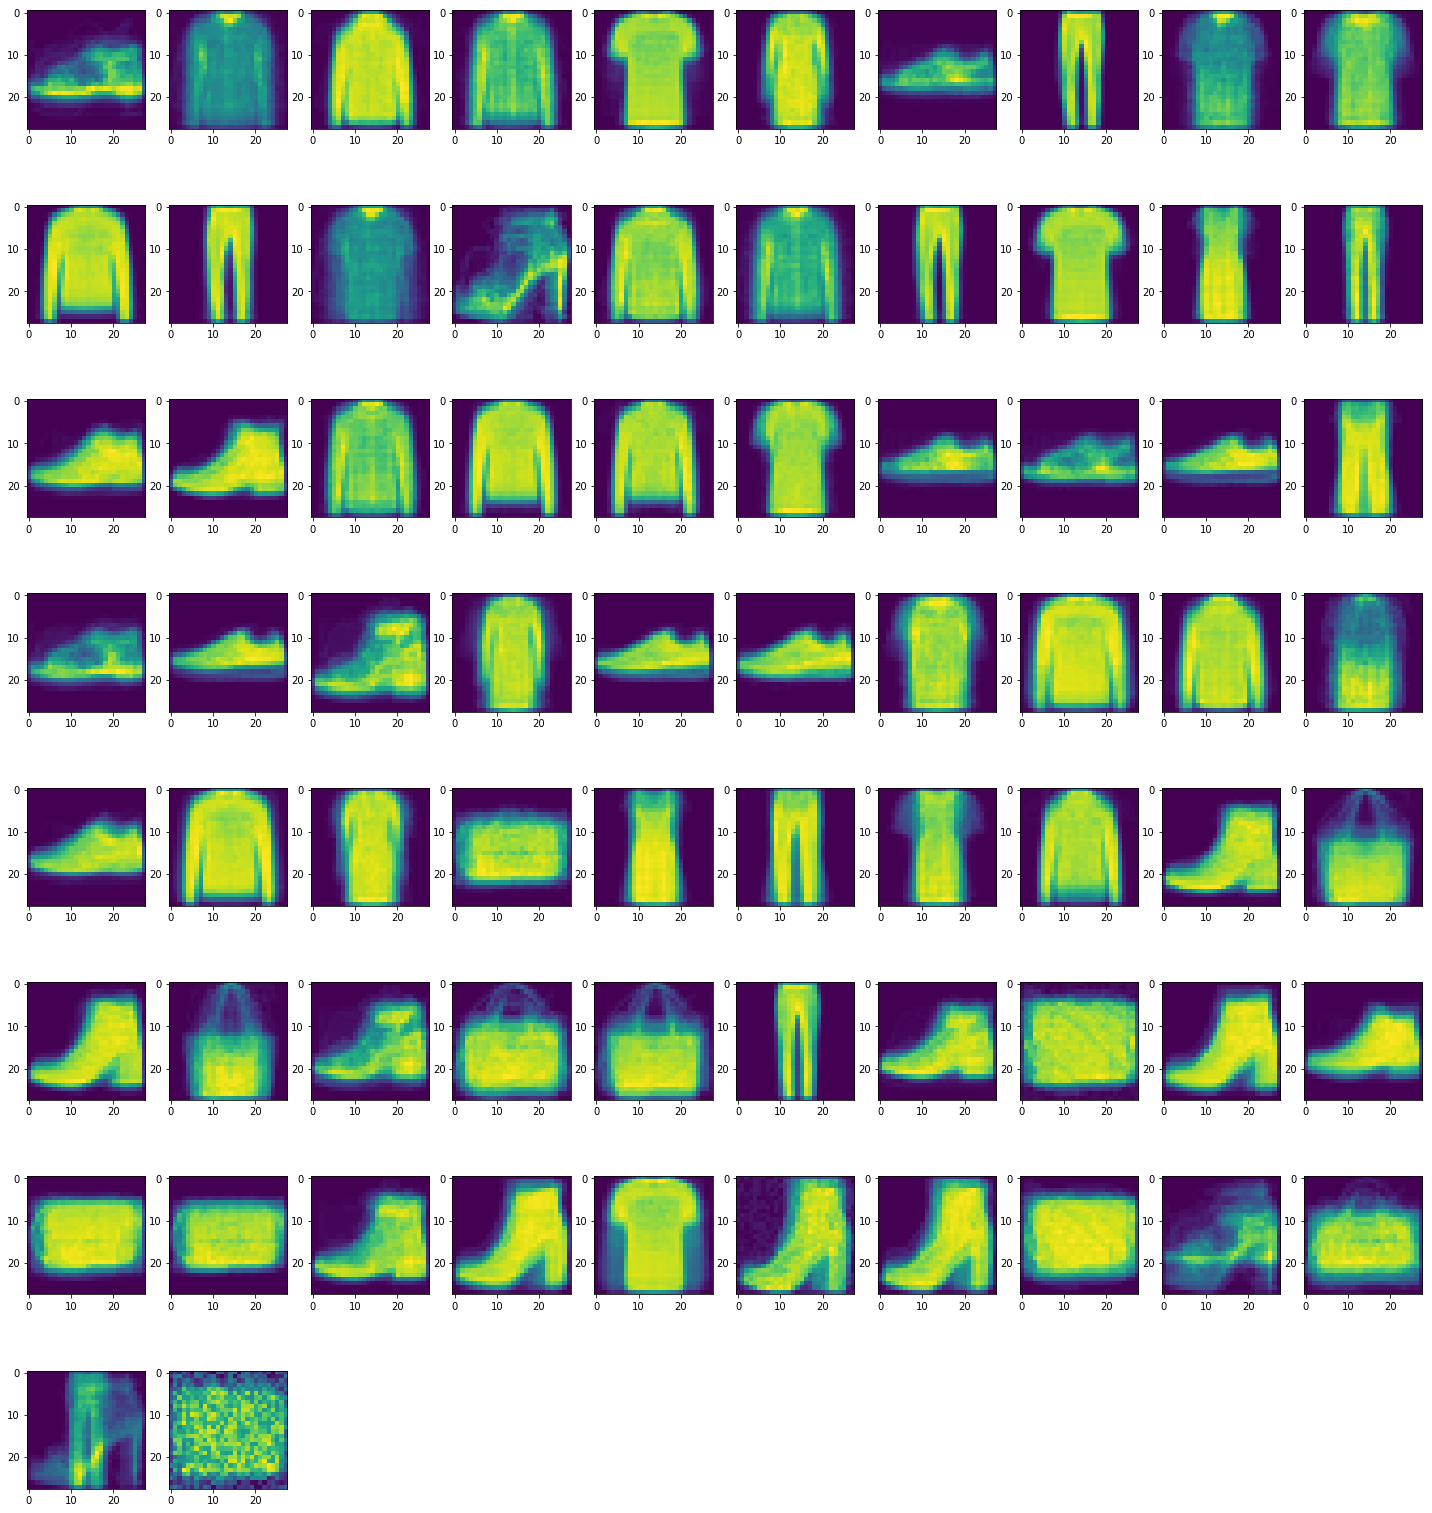

In [48]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,28))
j = 0
for (i,n) in count2.most_common()[0:72]:
    j+=1
    fig.add_subplot(8,10 , j)
    imshow(W2[i].reshape(28,28))

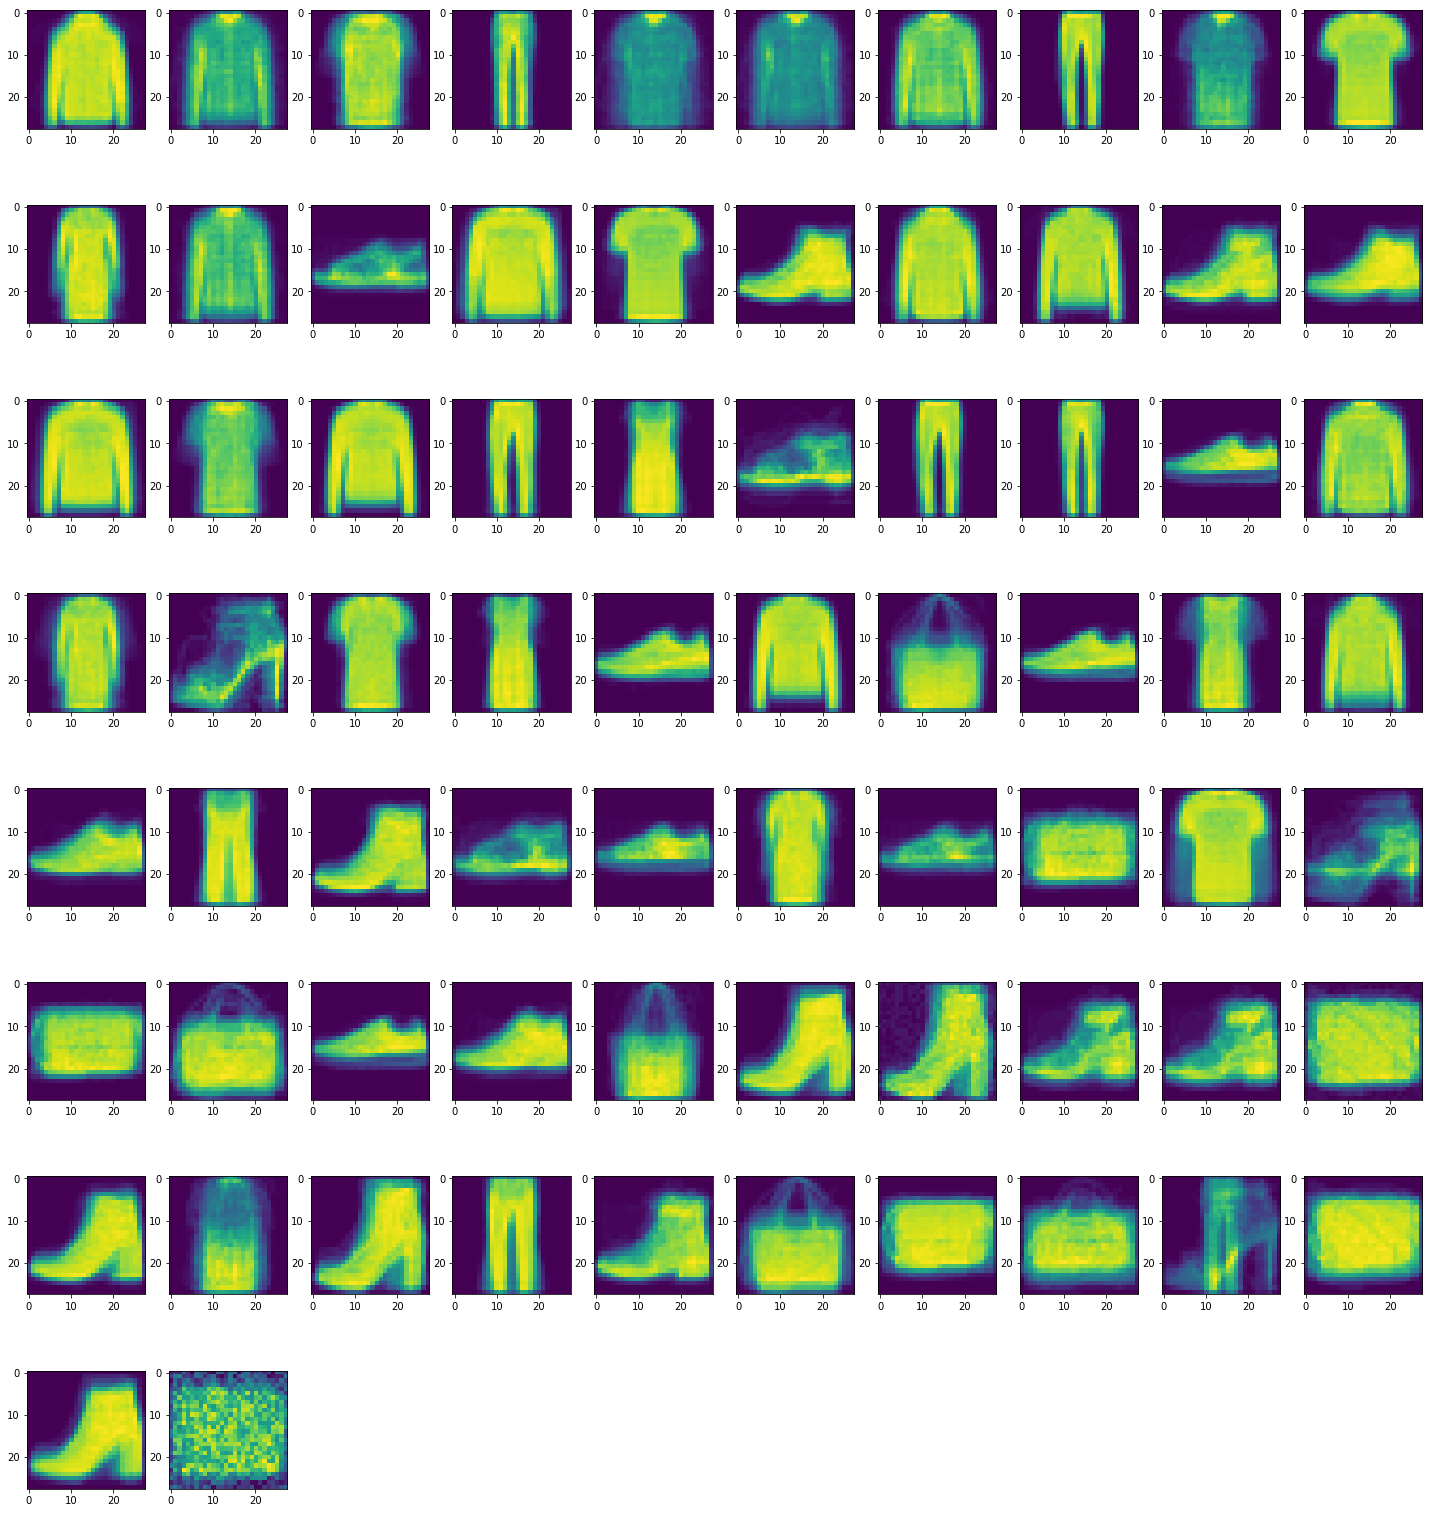

In [41]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,28))
j = 0
for (i,n) in count2.most_common()[0:72]:
    j+=1
    fig.add_subplot(8,10 , j)
    imshow(W2[i].reshape(28,28))

In [21]:
from operator import itemgetter
W3 = np.copy(W_main)
cond = True
it = 0
lr = 0.6
W3 = W3.reshape(29,29,784)
while cond:
    print('iteration : ', it)
    it = it + 1
    W_last_epoch = np.copy(W3)
    for x in x_train:
        Dj = []
        for k in range(W3.shape[0]):
            for j in range(W3.shape[1]):
                Dj.append(np.sum(np.square(x - W3[k][j])))
        maxind = np.argmin(Dj) 
        K = int(maxind/29)
        J = maxind%29
        W3[J][K] = W3[J][K] + lr*(x - W3[J][K])
        if J != 28 :
            W3[J+1][K] = W3[J+1][K] + lr*(x - W3[J+1][K])
        if J != 0 :
            W3[J-1][K] = W3[J-1][K] + lr*(x - W3[J-1][K])
        if K != 28 :
            W3[J][K+1] = W3[J][K+1] + lr*(x - W3[J][K+1])
        if K != 0 :
            W3[J][K-1] = W3[J][K-1] + lr*(x - W3[J][K-1])
                
    lr = 0.8*lr
    
    print(np.max(np.absolute(W3 - W_last_epoch)))
    if np.max(np.absolute(W3 - W_last_epoch))  < 0.001:
        cond = False
print(W3)


iteration :  0
0.9999846454841101
iteration :  1
0.9997555935460545
iteration :  2
0.9979621795606293
iteration :  3
0.9451206797744071
iteration :  4
0.8599295747954355
iteration :  5
0.8252162806584991
iteration :  6
0.5605984199543808
iteration :  7
0.35144017106030656
iteration :  8
0.4114759647855201
iteration :  9
0.2702382814349953
iteration :  10
0.1885911459353673
iteration :  11
0.15804911273073552
iteration :  12
0.11963025584003184
iteration :  13
0.0867163011687167
iteration :  14
0.08303033682714989
iteration :  15
0.06092086111835976
iteration :  16
0.05019004853089121
iteration :  17
0.04631230522551877
iteration :  18
0.03327867642278015
iteration :  19
0.027970505764679077
iteration :  20
0.017234775854134687
iteration :  21
0.013852366214874623
iteration :  22
0.01604484365838349
iteration :  23
0.010808673899402321
iteration :  24
0.007511811644732247
iteration :  25
0.007042214602314523
iteration :  26
0.005517521379810708
iteration :  27
0.004100832179899205
itera

In [22]:
y_pred3 = []
for x in x_test:
    Dj = []
    for i in range(W3.shape[0]):
        for j in range(W3.shape[0]):
            Dj.append(np.sum(np.square(W3[i][j]-x)))
    J = np.argmin(Dj)
    y_pred3.append(J)

In [23]:
from collections import Counter
count3 =Counter(y_pred3)
count3

Counter({591: 3,
         659: 4,
         403: 4,
         374: 6,
         478: 4,
         373: 2,
         593: 4,
         394: 9,
         704: 4,
         791: 2,
         664: 2,
         311: 2,
         646: 5,
         771: 1,
         658: 5,
         542: 3,
         330: 6,
         482: 4,
         569: 4,
         165: 2,
         135: 6,
         105: 1,
         767: 2,
         341: 9,
         688: 8,
         683: 2,
         217: 3,
         516: 5,
         362: 4,
         365: 3,
         550: 4,
         654: 7,
         504: 4,
         427: 3,
         643: 1,
         166: 2,
         216: 1,
         510: 5,
         405: 2,
         563: 8,
         657: 6,
         440: 2,
         513: 2,
         798: 6,
         627: 6,
         571: 5,
         570: 7,
         535: 4,
         299: 1,
         746: 3,
         622: 6,
         731: 1,
         556: 1,
         388: 1,
         647: 3,
         768: 1,
         346: 7,
         651: 4,
         608: 

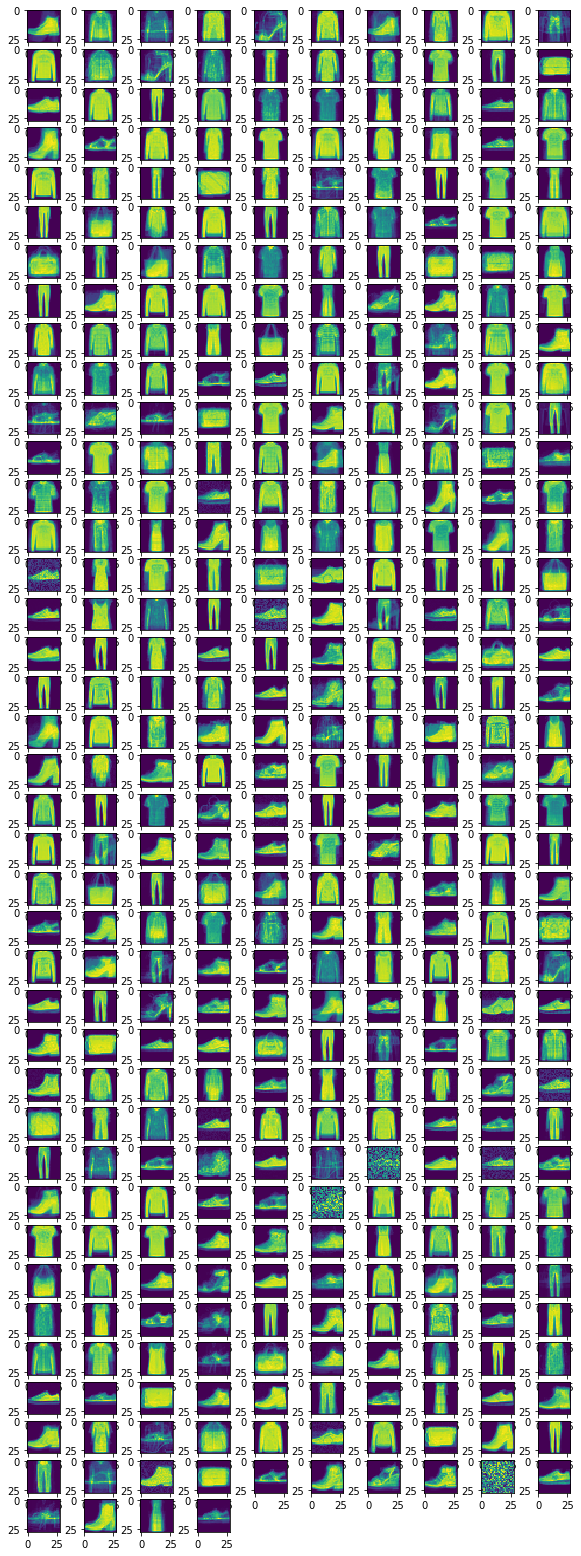

In [38]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,28))
j = 0
for (i,n) in count3.most_common()[0:384]:
    j+=1
    fig.add_subplot(39,10 , j)
    K = int(i/29)
    J = i%29
    imshow(W3[J][K].reshape(28,28))

In [32]:
len(count2)

72

In [33]:
len(count3)

384